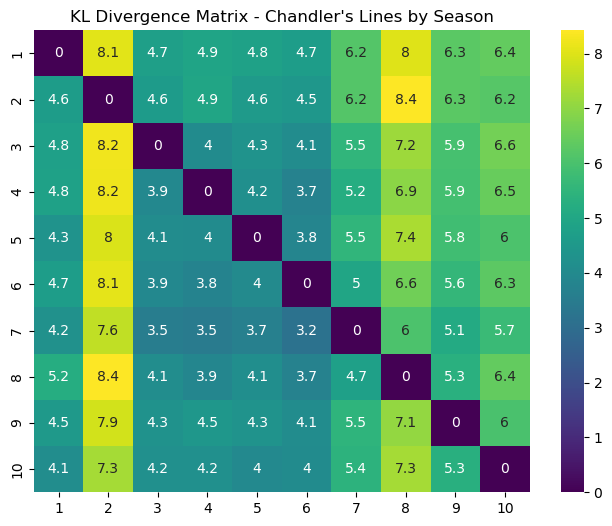

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram

# Define the KL divergence function with epsilon for smoothing
def kl_divergence(p, q, epsilon=1e-10):
    p = np.asarray(p) + epsilon
    q = np.asarray(q) + epsilon
    return np.sum(p * np.log(p / q))

# Function to process text and calculate word probability distribution with add-one smoothing
def process_text(file_path, exclude_characters=[]):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Preprocess text (you may need to adjust this based on your specific requirements)
    words = [word.lower() for line in lines for word in line.split() if word.lower() not in exclude_characters]

    # Calculate word frequencies with add-one smoothing
    word_freq = Counter(words)
    total_words = len(words)
    prob_dist = {word: (freq + 1) / (total_words + len(word_freq)) for word, freq in word_freq.items()}

    return prob_dist

# Function to compare characters and calculate KL divergence with add-one smoothing
def compare_characters_kl_divergence_smoothed(character1_path, character2_path, exclude_characters=[]):
    # Process text for each character (excluding character names)
    prob_dist_char1 = process_text(character1_path, exclude_characters)
    prob_dist_char2 = process_text(character2_path, exclude_characters)

    # Get the unique words from both characters
    all_words = set(prob_dist_char1.keys()) | set(prob_dist_char2.keys())

    # Create probability distributions for KL divergence calculation
    prob_dist1 = np.array([prob_dist_char1.get(word, 0) for word in all_words])
    prob_dist2 = np.array([prob_dist_char2.get(word, 0) for word in all_words])

    # Calculate KL divergence
    divergence = kl_divergence(prob_dist1, prob_dist2)

    return divergence

# Function to compare characters and calculate KL divergence with add-one smoothing by season
def compare_characters_kl_divergence_smoothed_by_season(character_path, seasons, exclude_characters=[]):
    # Create a matrix to store KL divergences
    divergence_matrix = np.zeros((len(seasons), len(seasons)))

    # Compare characters and fill the matrix (excluding character names)
    for i, season1 in enumerate(seasons):
        for j, season2 in enumerate(seasons):
            if i != j:
                season1_path = os.path.join(character_path, f'Season_{season1}.txt')
                season2_path = os.path.join(character_path, f'Season_{season2}.txt')
                divergence_matrix[i, j] = compare_characters_kl_divergence_smoothed(season1_path, season2_path, exclude_characters)

    return divergence_matrix

# Function to visualize KL divergences in a heatmap
def visualize_heatmap(divergence_matrix, seasons):
    # Create a heatmap for the KL divergence matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(divergence_matrix, annot=True, cmap='viridis', xticklabels=seasons, yticklabels=seasons)
    plt.title('KL Divergence Matrix - Chandler\'s Lines by Season')
    plt.show()

# Character to analyze
character = 'Chandler'

# Directory for Chandler's lines by season
character_directory = r'C:\Users\jesse\Desktop\CAA\By_Season\Chandler'

# Seasons to analyze
seasons_to_analyze = list(range(1, 11))

# Compare characters by season
divergence_matrix = compare_characters_kl_divergence_smoothed_by_season(character_directory, seasons_to_analyze, exclude_characters=[character.lower()])

# Visualize the result in a heatmap
visualize_heatmap(divergence_matrix, seasons_to_analyze)


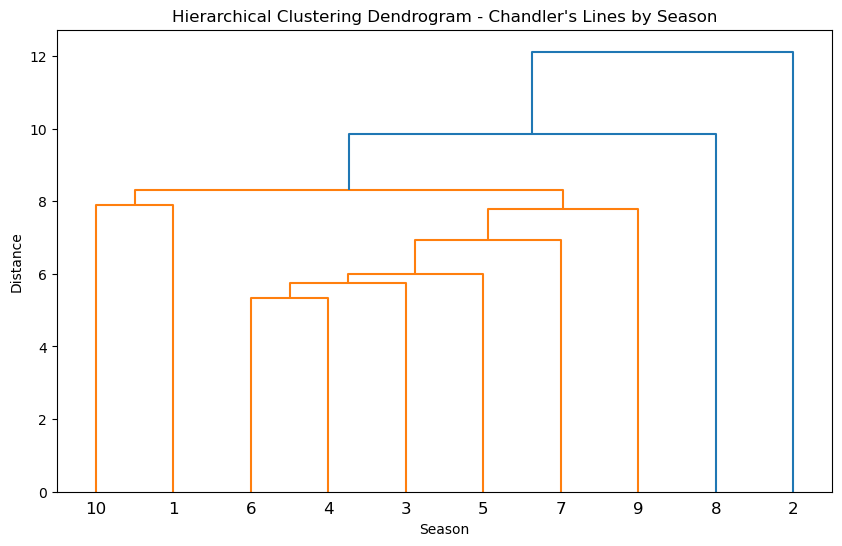

In [2]:
# Perform hierarchical clustering
linkage_matrix = linkage(divergence_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=seasons_to_analyze, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Chandler\'s Lines by Season')
plt.xlabel('Season')
plt.ylabel('Distance')
plt.show()